**ใน Matlab:**
- หลังจากทํา Ranking ยาเสร็จจะได้ 45,701 samples 

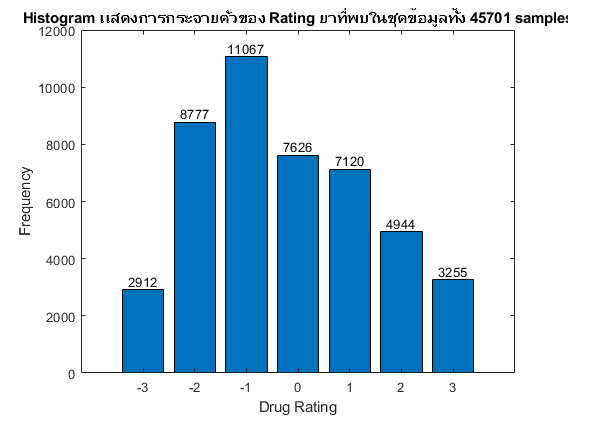

- เลือกเเค่เฉพาะกลุ่มยาที่มี rating: +1 +2 +3 จะเหลือ 15,319 samples
- กรอง sample ที่มี GFR ใน State k เกิด Range ของ CKD Stage 3-5 ออก
- จับกลุ่มลักษณะข้อมูล (Combination ได้ออกมา 36 combination จับกลุ่มมองคล้ายๆ ใน flowchart ให้ rating ยา) 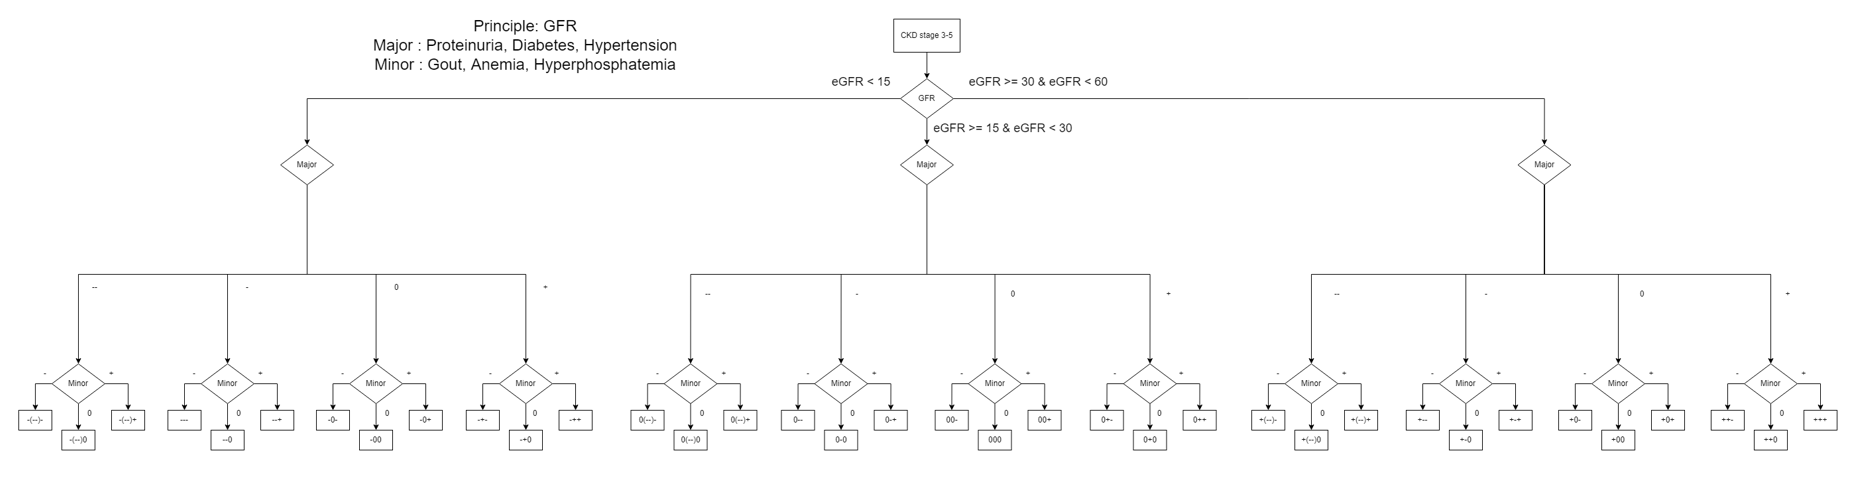

- หลังจากนั้นทํา binary conversion ข้อมูลส่วน status state k กับ drug (เหลือ Testing drug เเปลงเป็น -1 ก่อนนําไป test ซึ่งจะทําในขั้นตอนการทํา Model)

  **For [Protein,	UPCR,	Protein_24hr_urine,	Microalbumin_urine,	HbA1c,	Bloodpressure,	Uric_acid,	Hemoglobin,	PHOSPHATE_INORGANIC]**
  - Status: [ -1 = ไม่มีข้อมูล , 1 = bad condition [from treshold: (-) or (--)] , 0 = Good condition] 

  **For [CKD_Stage3,	CKD_Stage4,	CKD_Stage5]**    
  - Status: [1 = เป็น, 0 = ไม่เป็น]
  - Drug: [0 = ไม่มีการจ่ายยา, 1 = มีการจ่ายยา]
- save เป็น 36 csv file (14,352 samples) โดยเเต่ละ sample มี 114 columns เป็น Binary value: [Status(12 factor) + Drug(102 ชนิด)] 

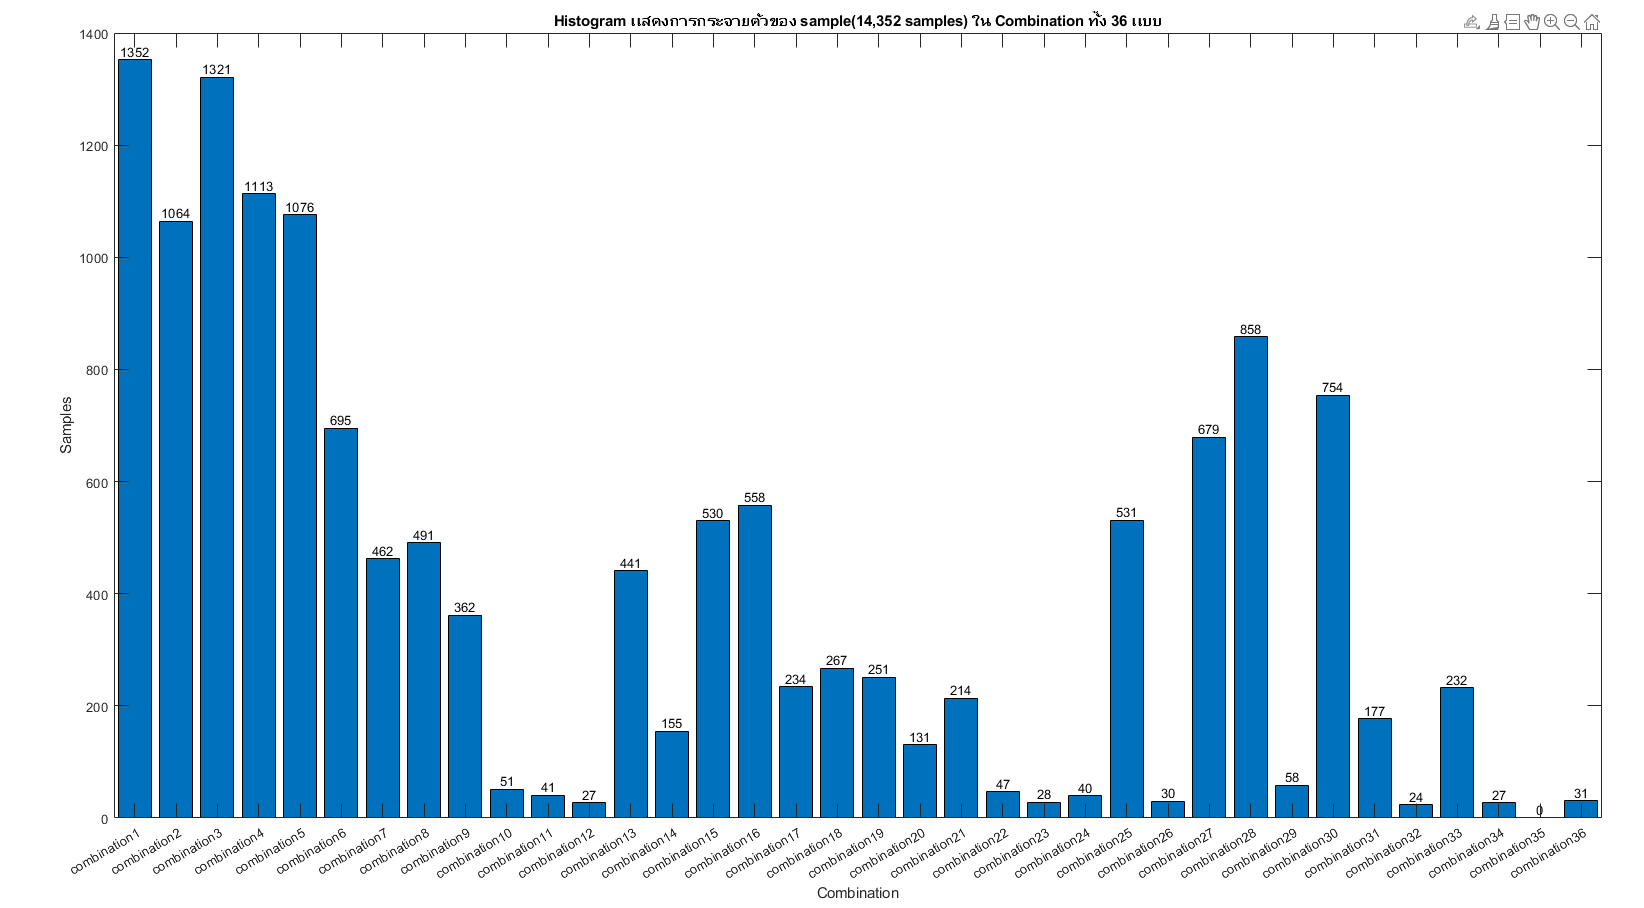

**ใน Python:**
- นําทั้ง 36 csv file ไป Train test split: 80/20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/AI Kidney Project/Kidney Data 12 ปี/only_combination/Combination dataset.rar' 'PMK_Data'
!mkdir "Combination dataset"
!unrar x "PMK_Data" "Combination dataset";


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from PMK_Data

Creating    Combination dataset/Combination dataset                   OK
Extracting  Combination dataset/Combination dataset/combination10.csv       0%  OK 
Extracting  Combination dataset/Combination dataset/combination11.csv       1%  OK 
Extracting  Combination dataset/Combination dataset/combination12.csv       2%  OK 
Extracting  Combination dataset/Combination dataset/combination13.csv       5%  OK 
Extracting  Combination dataset/Combination dataset/combination14.csv       7%  OK 
Extracting  Combination dataset/Combination dataset/combination15.csv      10%  OK 
Extracting  Combination dataset/Combination dataset/combination16.csv      13%  OK 
Extracting  Combination dataset/Combination dataset/combination17.csv      15%  OK 
Extracting  Combination dataset/Combination dataset/combination18.csv      17% 

In [ ]:
comb1 = pd.read_csv('/content/Combination dataset/Combination dataset/combination1.csv')
comb2 = pd.read_csv('/content/Combination dataset/Combination dataset/combination2.csv')
comb3 = pd.read_csv('/content/Combination dataset/Combination dataset/combination3.csv')
comb4 = pd.read_csv('/content/Combination dataset/Combination dataset/combination4.csv')
comb5 = pd.read_csv('/content/Combination dataset/Combination dataset/combination5.csv')
comb6 = pd.read_csv('/content/Combination dataset/Combination dataset/combination6.csv')
comb7 = pd.read_csv('/content/Combination dataset/Combination dataset/combination7.csv')
comb8 = pd.read_csv('/content/Combination dataset/Combination dataset/combination8.csv')
comb9 = pd.read_csv('/content/Combination dataset/Combination dataset/combination9.csv')
comb10 = pd.read_csv('/content/Combination dataset/Combination dataset/combination10.csv')
comb11 = pd.read_csv('/content/Combination dataset/Combination dataset/combination11.csv')
comb12 = pd.read_csv('/content/Combination dataset/Combination dataset/combination12.csv')

In [ ]:
comb13 = pd.read_csv('/content/Combination dataset/Combination dataset/combination13.csv')
comb14 = pd.read_csv('/content/Combination dataset/Combination dataset/combination14.csv')
comb15 = pd.read_csv('/content/Combination dataset/Combination dataset/combination15.csv')
comb16 = pd.read_csv('/content/Combination dataset/Combination dataset/combination16.csv')
comb17 = pd.read_csv('/content/Combination dataset/Combination dataset/combination17.csv')
comb18 = pd.read_csv('/content/Combination dataset/Combination dataset/combination18.csv')
comb19 = pd.read_csv('/content/Combination dataset/Combination dataset/combination19.csv')
comb20 = pd.read_csv('/content/Combination dataset/Combination dataset/combination20.csv')
comb21 = pd.read_csv('/content/Combination dataset/Combination dataset/combination21.csv')
comb22 = pd.read_csv('/content/Combination dataset/Combination dataset/combination22.csv')
comb23 = pd.read_csv('/content/Combination dataset/Combination dataset/combination23.csv')
comb24 = pd.read_csv('/content/Combination dataset/Combination dataset/combination24.csv')

In [ ]:
comb25 = pd.read_csv('/content/Combination dataset/Combination dataset/combination25.csv')
comb26 = pd.read_csv('/content/Combination dataset/Combination dataset/combination26.csv')
comb27 = pd.read_csv('/content/Combination dataset/Combination dataset/combination27.csv')
comb28 = pd.read_csv('/content/Combination dataset/Combination dataset/combination28.csv')
comb29 = pd.read_csv('/content/Combination dataset/Combination dataset/combination29.csv')
comb30 = pd.read_csv('/content/Combination dataset/Combination dataset/combination30.csv')
comb31 = pd.read_csv('/content/Combination dataset/Combination dataset/combination31.csv')
comb32 = pd.read_csv('/content/Combination dataset/Combination dataset/combination32.csv')
comb33 = pd.read_csv('/content/Combination dataset/Combination dataset/combination33.csv')
comb34 = pd.read_csv('/content/Combination dataset/Combination dataset/combination34.csv')
comb35 = pd.read_csv('/content/Combination dataset/Combination dataset/combination35.csv')
comb36 = pd.read_csv('/content/Combination dataset/Combination dataset/combination36.csv')

In [ ]:
comb35.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 114 entries, CKD_Stage3 to ZAN105N
dtypes: object(114)
memory usage: 0.0+ bytes


In [ ]:
all_comb = pd.concat([comb1,comb2,comb3,comb4,comb5,comb6,comb7,comb8,comb9,comb10,comb11,comb12,comb13,comb14,comb15,comb16,comb17,comb18,comb19,comb20,comb21,comb22,comb23,comb24,comb25,comb26,comb27,comb28,comb29,comb30,comb31,comb32,comb33,comb34,comb36])
#all_comb.reset_index(drop=True ,inplace=True) #reset index and drop old index
all_comb

,CKD_Stage3,CKD_Stage4,CKD_Stage5,Protein,UPCR,Protein_24hr_urine,Microalbumin_urine,HbA1c,Bloodpressure,Uric_acid,...,SPI101E,SPI102E,TRA109N,TRI110N,TRI111N,TRU200N,TWY100N,UNI101N,VIC200N,ZAN105N
0,1,0,0,-1,-1,-1,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,-1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,-1,-1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,-1,-1,-1,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,1,1,1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
27,0,0,1,-1,-1,1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0
28,0,0,1,1,-1,-1,-1,1,-1,1,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,1,-1,-1,-1,-1,-1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
all_comb.to_csv("all_combination.csv")

#**Preprocessing Data Part1**

---

##**Train / Test split:** 


---

- Training set: 80%
- Testing set: 20%

In [ ]:
train1, test1 = train_test_split(comb1, test_size=0.2, random_state=42)
train2, test2 = train_test_split(comb2, test_size=0.2, random_state=42)
train3, test3 = train_test_split(comb3, test_size=0.2, random_state=42)
train4, test4 = train_test_split(comb4, test_size=0.2, random_state=42)
train5, test5 = train_test_split(comb5, test_size=0.2, random_state=42)
train6, test6 = train_test_split(comb6, test_size=0.2, random_state=42)
train7, test7 = train_test_split(comb7, test_size=0.2, random_state=42)
train8, test8 = train_test_split(comb8, test_size=0.2, random_state=42)
train9, test9 = train_test_split(comb9, test_size=0.2, random_state=42)
train10, test10 = train_test_split(comb10, test_size=0.2, random_state=42)
train11, test11 = train_test_split(comb11, test_size=0.2, random_state=42)
train12, test12 = train_test_split(comb12, test_size=0.2, random_state=42)
train13, test13 = train_test_split(comb13, test_size=0.2, random_state=42)
train14, test14 = train_test_split(comb14, test_size=0.2, random_state=42)
train15, test15 = train_test_split(comb15, test_size=0.2, random_state=42)
train16, test16 = train_test_split(comb16, test_size=0.2, random_state=42)
train17, test17 = train_test_split(comb17, test_size=0.2, random_state=42)
train18, test18 = train_test_split(comb18, test_size=0.2, random_state=42)
train19, test19 = train_test_split(comb19, test_size=0.2, random_state=42)
train20, test20 = train_test_split(comb20, test_size=0.2, random_state=42)
train21, test21 = train_test_split(comb21, test_size=0.2, random_state=42)
train22, test22 = train_test_split(comb22, test_size=0.2, random_state=42)
train23, test23 = train_test_split(comb23, test_size=0.2, random_state=42)
train24, test24 = train_test_split(comb24, test_size=0.2, random_state=42)
train25, test25 = train_test_split(comb25, test_size=0.2, random_state=42)
train26, test26 = train_test_split(comb26, test_size=0.2, random_state=42)
train27, test27 = train_test_split(comb27, test_size=0.2, random_state=42)
train28, test28 = train_test_split(comb28, test_size=0.2, random_state=42)
train29, test29 = train_test_split(comb29, test_size=0.2, random_state=42)
train30, test30 = train_test_split(comb30, test_size=0.2, random_state=42)
train31, test31 = train_test_split(comb31, test_size=0.2, random_state=42)
train32, test32 = train_test_split(comb32, test_size=0.2, random_state=42)
train33, test33 = train_test_split(comb33, test_size=0.2, random_state=42)
train34, test34 = train_test_split(comb34, test_size=0.2, random_state=42)
#train35, test35 = train_test_split(comb35, test_size=0.2, random_state=42) #ไม่มี ข้อมูลใน file นี้
train36, test36 = train_test_split(comb36, test_size=0.2, random_state=42)

In [ ]:
len(train1),len(test1)

(1081, 271)

In [ ]:
#Vertical concat make Training set
train = pd.concat([train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11,train12,train13,train14,train15,train16,train17,train18,train19,train20,train21,train22,train23,train24,train25,train26,train27,train28,train29,train30,train31,train32,train33,train34,train36])
train.reset_index(drop=True ,inplace=True) #reset index and drop old index
train

,CKD_Stage3,CKD_Stage4,CKD_Stage5,Protein,UPCR,Protein_24hr_urine,Microalbumin_urine,HbA1c,Bloodpressure,Uric_acid,...,SPI101E,SPI102E,TRA109N,TRI110N,TRI111N,TRU200N,TWY100N,UNI101N,VIC200N,ZAN105N
0,1,0,0,0,-1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,-1,-1,-1,-1,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,-1,-1,-1,0,0,-1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,-1,-1,-1,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,-1,-1,-1,-1,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,0,0,1,1,-1,-1,-1,-1,-1,1,...,0,0,0,0,0,0,0,0,0,0
11461,0,0,1,1,-1,-1,-1,0,-1,1,...,0,0,1,0,0,0,0,0,0,0
11462,0,0,1,1,-1,-1,-1,1,-1,1,...,0,0,0,0,0,0,0,0,0,0
11463,0,0,1,1,-1,-1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Vertical concat make Testing set
test = pd.concat([test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15,test16,test17,test18,test19,test20,test21,test22,test23,test24,test25,test26,test27,test28,test29,test30,test31,test32,test33,test34,test36])
test.reset_index(drop=True ,inplace=True) #reset index and drop old index
test

,CKD_Stage3,CKD_Stage4,CKD_Stage5,Protein,UPCR,Protein_24hr_urine,Microalbumin_urine,HbA1c,Bloodpressure,Uric_acid,...,SPI101E,SPI102E,TRA109N,TRI110N,TRI111N,TRU200N,TWY100N,UNI101N,VIC200N,ZAN105N
0,1,0,0,0,0,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,-1,-1,-1,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,-1,-1,-1,-1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,-1,-1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,0,0,1,1,1,-1,-1,-1,-1,1,...,0,0,0,0,0,0,0,0,0,0
2883,0,0,1,1,1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2884,0,0,1,1,1,-1,-1,-1,-1,1,...,0,0,0,0,0,0,0,0,0,0
2885,0,0,1,1,-1,-1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.to_csv("Training_set_80.csv")
test.to_csv("Testing_set_20.csv")

#**Mark index ของเเต่ละ combination:**

---

 1.Training set 
 
 2.Testing set

In [ ]:
#Train set: มีทั้งหมด 10026 sample
all_train_comb = [train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11,train12,train13,train14,train15,train16,train17,train18,train19,train20,train21,train22,train23,train24,train25,train26,train27,train28,train29,train30,train31,train32,train33,train34,train36]
start_index = 0
last_index_comb = 0
for i in range(0, 35):
  if i != 34: 
    last_index_comb = start_index + len(all_train_comb[i])-1
    print("Combination %d in training set index: %d to %d" %(i+1,start_index+1,last_index_comb+1)) #for matlab
    start_index = last_index_comb+1
  else:
    print("We not have data in Combination %d " %(i+1) )
    last_index_comb = start_index + len(all_train_comb[i])-1
    print("Combination %d in training set index: %d to %d" %(i+2,start_index+1,last_index_comb+1)) #for matlab

Combination 1 in training set index: 1 to 1081
Combination 2 in training set index: 1082 to 1932
Combination 3 in training set index: 1933 to 2988
Combination 4 in training set index: 2989 to 3878
Combination 5 in training set index: 3879 to 4738
Combination 6 in training set index: 4739 to 5294
Combination 7 in training set index: 5295 to 5663
Combination 8 in training set index: 5664 to 6055
Combination 9 in training set index: 6056 to 6344
Combination 10 in training set index: 6345 to 6384
Combination 11 in training set index: 6385 to 6416
Combination 12 in training set index: 6417 to 6437
Combination 13 in training set index: 6438 to 6789
Combination 14 in training set index: 6790 to 6913
Combination 15 in training set index: 6914 to 7337
Combination 16 in training set index: 7338 to 7783
Combination 17 in training set index: 7784 to 7970
Combination 18 in training set index: 7971 to 8183
Combination 19 in training set index: 8184 to 8383
Combination 20 in training set index: 8384 

In [ ]:
#Train set: มีทั้งหมด 4325 sample
all_test_comb = [test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15,test16,test17,test18,test19,test20,test21,test22,test23,test24,test25,test26,test27,test28,test29,test30,test31,test32,test33,test34,test36]
start_index = 0
last_index_comb = 0
for i in range(0, 35):
  if i != 34: 
    last_index_comb = start_index + len(all_test_comb[i])-1
    print("Combination %d in Testing set index: %d to %d" %(i+1,start_index+1,last_index_comb+1))
    start_index = last_index_comb+1
  else:
    print("We not have data in Combination %d " %(i+1) )
    last_index_comb = start_index + len(all_test_comb[i])-1
    print("Combination %d in Testing set index: %d to %d" %(i+2,start_index+1,last_index_comb+1))

Combination 1 in Testing set index: 1 to 271
Combination 2 in Testing set index: 272 to 484
Combination 3 in Testing set index: 485 to 749
Combination 4 in Testing set index: 750 to 972
Combination 5 in Testing set index: 973 to 1188
Combination 6 in Testing set index: 1189 to 1327
Combination 7 in Testing set index: 1328 to 1420
Combination 8 in Testing set index: 1421 to 1519
Combination 9 in Testing set index: 1520 to 1592
Combination 10 in Testing set index: 1593 to 1603
Combination 11 in Testing set index: 1604 to 1612
Combination 12 in Testing set index: 1613 to 1618
Combination 13 in Testing set index: 1619 to 1707
Combination 14 in Testing set index: 1708 to 1738
Combination 15 in Testing set index: 1739 to 1844
Combination 16 in Testing set index: 1845 to 1956
Combination 17 in Testing set index: 1957 to 2003
Combination 18 in Testing set index: 2004 to 2057
Combination 19 in Testing set index: 2058 to 2108
Combination 20 in Testing set index: 2109 to 2135
Combination 21 in Te

In [ ]:
train36

,CKD_Stage3,CKD_Stage4,CKD_Stage5,Protein,UPCR,Protein_24hr_urine,Microalbumin_urine,HbA1c,Bloodpressure,Uric_acid,...,SPI101E,SPI102E,TRA109N,TRI110N,TRI111N,TRU200N,TWY100N,UNI101N,VIC200N,ZAN105N
24,0,0,1,1,-1,-1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,1,1,-1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,-1,-1,1,-1,1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,-1,1,-1,1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
16,0,0,1,1,-1,-1,1,1,-1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,-1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,1,1,-1,-1,1,-1,1,...,0,0,0,0,0,0,0,0,0,0
11,0,0,1,-1,1,-1,-1,0,-1,1,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,1,-1,-1,1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,-1,-1,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0


**Checking**

---



In [ ]:
#train36

In [ ]:
#testing_df.loc[722:725]

In [ ]:
#test1

In [ ]:
#testing_df = pd.read_csv('/content/Testing_set.csv')
#testing_df